<a href="https://colab.research.google.com/github/Via-88/Deep-Learning/blob/master/CNN_%26_Tensorflow_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN & Tensorflow 
***

**Tensorflow** is a fast and flexible open-source ML library for research and production, developed by Google Brain team.

**Keras** is a high-level API to build and train deep learning models.
***

The aim of this work is to create and train a CNN from scratch to complete a images classification task. 

**Dataset**

The [Fashion_MNIST Dataset](https://keras.io/datasets/) contains ten categories: 0. T-shirt/top, 1. Trouser, 2. Pullover, 3. Dress, 4. Coat, 5. Sandal, 6. Shirt, 7. Bag, 8. Sneaker 9. Ankle boot.

### Import the dataset

Load the fashion_MNIST dataset with keras.datasets API.

In [0]:
!pip install -q -U tensorflow>=1.8.0

In [0]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# split dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [5]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker', 'Bag','Ankle boot']

### Normalize data

In [0]:
x_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

In [8]:
print(x_test[0].shape)

(28, 28)


### Visualize data

In [0]:

image = x_test[0]
label = y_test[0]
  

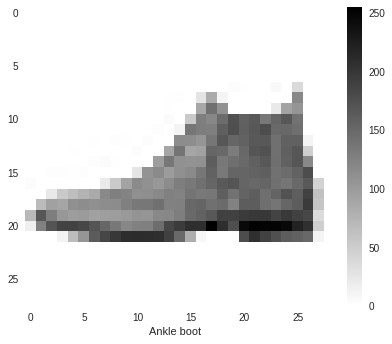

In [12]:
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.xlabel(class_names[label])
plt.colorbar()
plt.grid(False)
plt.show()

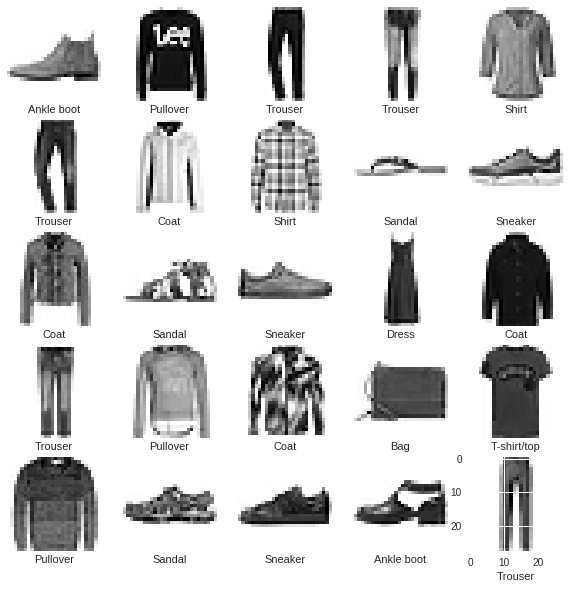

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  image = x_test[i]
  label = y_test[i]
  plt.xticks([])
  plt.yticks([])
  plt.subplot(5,5,i+1)
  plt.xlabel(class_names[label])
  plt.imshow(image,cmap=plt.cm.binary)
  i +=1
plt.show()

### Create Model

In [0]:
model = tf.keras.Sequential()

In [15]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,
                                 padding='same',activation='relu',input_shape=(28,28,1))),
model.add(tf.keras.layers.MaxPooling2D(pool_size=2)),

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',
                                activation='relu')),
model.add(tf.keras.layers.MaxPooling2D(pool_size=2)),

model.add(tf.keras.layers.Flatten()),
model.add(tf.keras.layers.Dense(256,activation='relu')),
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()






Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dens

### Compile the model
Use `model.compile` to configure the learning process before training the model. Here we define the type of loss function and optimizer and metrics evaluated by the model during training and testing.

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
x_train = x_train.reshape(60000, 28,28, 1)
x_test = x_test.reshape(10000,28,28,1)

### Train the Model

In [18]:
model.fit(x_train,y_train, batch_size=10,epochs=5)


Epoch 1/5
60000/60000 [==============================] - 43s 717us/sample - loss: 0.3590 - acc: 0.8702
Epoch 2/5
60000/60000 [==============================] - 40s 667us/sample - loss: 0.2357 - acc: 0.9119
Epoch 3/5
60000/60000 [==============================] - 40s 667us/sample - loss: 0.1906 - acc: 0.9283
Epoch 4/5
60000/60000 [==============================] - 40s 665us/sample - loss: 0.1559 - acc: 0.9401
Epoch 5/5
60000/60000 [==============================] - 40s 663us/sample - loss: 0.1275 - acc: 0.9518


### Evaluate the accuracy.

In [19]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print("Accuracy on test dataset {}".format(test_accuracy))

10000/10000 [==============================] - 1s 98us/sample - loss: 2.1122 - acc: 0.8673
Accuracy on test dataset 0.8672999739646912


Hmmm, overfitting?

#### Tuning parameters.

* Set `epochs=1`.

In [20]:
model.fit(x_train,y_train, batch_size=10,epochs=1)

60000/60000 [==============================] - 40s 664us/sample - loss: 0.1048 - acc: 0.9607


In [22]:
test_loss,test_accuracy_1 = model.evaluate(x_test,y_test)
print("Accuracy on test dataset {}".format(test_accuracy_1))

10000/10000 [==============================] - 1s 92us/sample - loss: 2.5098 - acc: 0.8424
Accuracy on test dataset 0.8424000144004822


*  Hmmm, not happy. Set the parameter of the Dense layer after the flatten layer to be 128.

In [34]:
model_new = tf.keras.Sequential()

model_new.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,
                                 padding='same',activation='relu',input_shape=(28,28,1))),
model_new.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)),

#model_new.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',
#                                activation='relu')),
#model_new.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2)),

model_new.add(tf.keras.layers.Flatten()),
model_new.add(tf.keras.layers.Dense(128,activation='relu')),
model_new.add(tf.keras.layers.Dense(10,activation='softmax'))

model_new.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_new.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model_new.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test),shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3849 - acc: 0.8619 - val_loss: 2.3409 - val_acc: 0.8523
Epoch 2/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2582 - acc: 0.9057 - val_loss: 2.1479 - val_acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.2126 - acc: 0.9220 - val_loss: 2.0055 - val_acc: 0.8734
Epoch 4/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.1790 - acc: 0.9337 - val_loss: 1.8084 - val_acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1496 - acc: 0.9447 - val_loss: 1.7336 - val_acc: 0.8908


In [37]:
test_loss,test_accuracy_1 = model_new.evaluate(x_test,y_test,  )
print("Accuracy on test dataset {}".format(test_accuracy_1))

10000/10000 [==============================] - 1s 74us/sample - loss: 1.7336 - acc: 0.8908
Accuracy on test dataset 0.8907999992370605


Not perfect. But it is almost bed time. Let's keep going.

### Make predictions and explore

In [38]:
x_test[10:25].shape

(15, 28, 28, 1)

In [39]:
test_images = x_test[:15]
test_labels = y_test[:15]
predictions = model_new.predict(test_images)
predictions[:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(
    y_test,
    model_new.predict_classes(x_test),
)


array([[740,  15,  15,  21,  12,   1, 186,   0,  10,   0],
       [  1, 991,   0,   2,   4,   0,   1,   0,   1,   0],
       [  5,   2, 762,   6, 111,   0, 114,   0,   0,   0],
       [  2,  87,  20, 819,  39,   0,  32,   0,   1,   0],
       [  0,   1,  16,  19, 910,   0,  54,   0,   0,   0],
       [  0,   0,   0,   0,   1, 981,   0,   6,   1,  11],
       [ 38,   6,  32,  20,  77,   0, 820,   0,   7,   0],
       [  0,   0,   0,   0,   0,  22,   0, 925,   4,  49],
       [  2,   3,   3,   1,   3,   2,   8,   1, 977,   0],
       [  0,   0,   0,   0,   1,   5,   1,   9,   1, 983]])

In [133]:
np.argmax(predictions[12])

8

In [134]:
test_labels[12]

7

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0],cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color
                                   )
  
def plot_value_array(i, predictions_array, true_labels):
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

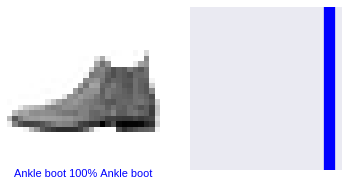

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


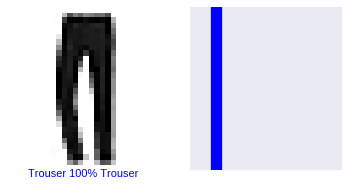

In [43]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


In [78]:
x_test[3].reshape(28,28).shape

(28, 28)

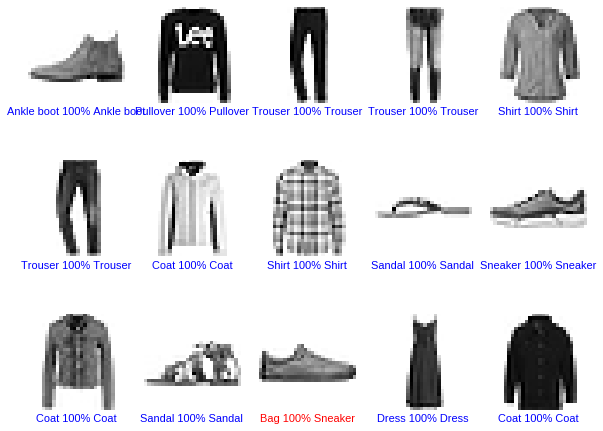

In [83]:
plt.figure(figsize=(10,8))

for i in range(15):
  img = (x_test[i]).reshape(28,28)
  
  plt.subplot(3,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions[i])
  true_label = y_test[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label],
                                   100*np.max(predictions[i]),
                                    class_names[true_label]),
                                    color=color
                                   )